# DAND - Project 2 - Data Analysis

This project will conduct a Data Analysis on the Titanic passengers data

In [76]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# load the data
passengers_df = pd.read_csv("titanic_data.csv")

passengers_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


We are interested in several questions:
* Average survival rate and distribution in ages
* The survival rate of children (age 18 and under), adult males, adult females
* Survival rate by socio-economic status (Pclass)
* Does having Sibling or Spouse on the ship inrease/decrease survivability (SibSp > 0 or Parch > 0)
* Are there any tendencies for Port of Embarkation - e.g. people or children concentration

In [77]:
print "Rows count:"
passengers_df.count()

Rows count:


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [78]:
survival_mean = passengers_df["Survived"].mean()
print "Survived {} out of {}".format(passengers_df["Survived"].sum(), passengers_df["Survived"].count())
print "Average probability of survival: {}".format(round(survival_mean, 2))

Survived 342 out of 891
Average probability of survival: 0.38


In [79]:
def round_age(s):
    # because children under 1 are floatt with leading zeroes we ceil the values and then round them 
    # to get ages as integers for better visibility
    s['Age'] = round(math.ceil(s['Age']), 0)
    return s


0.3333333333333333

In [49]:
# separate survivors and non survivors
survivors = passengers_df[passengers_df["Survived"] > 0]
non_survivors = passengers_df[passengers_df["Survived"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


Populating the interactive namespace from numpy and matplotlib


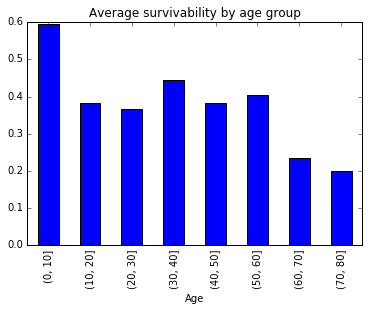

In [184]:
%pylab inline
# take all the passengers with 'Age'  value
df_with_ages = passengers_df[pd.notnull(passengers_df['Age'])]
# group them by 10 years and 
group_by_age = df_with_ages.groupby(pd.cut(df_with_ages['Age'], np.arange(0, 90, 10), include_lowest=False))
group_by_age['Survived'].mean().plot(kind="bar", title="Average survivability by age group")

Sources:
  1. [Titanic passengers' data and description](https://www.kaggle.com/c/titanic/data)